In [14]:
# Import necessary libraries

#from temporal_diagrams import plot_microservices_over_time


In [4]:
import os
from raphtory import Graph

def load_graphs_lazy(graph_paths):
    """Generator function to lazily load graphs from files."""
    for path in graph_paths:
        if os.path.isfile(path):
            yield Graph.load_from_file(path)
        else:
            print(f"File does not exist: {path}")
            yield None

# Assuming you have a list of paths to your graph files
graph_paths = [f"C:/ms_bincode/Graph_{i}" for i in range(1, 3)]

# Use the generator to iterate over graphs lazily
graphs_lazy = load_graphs_lazy(graph_paths)


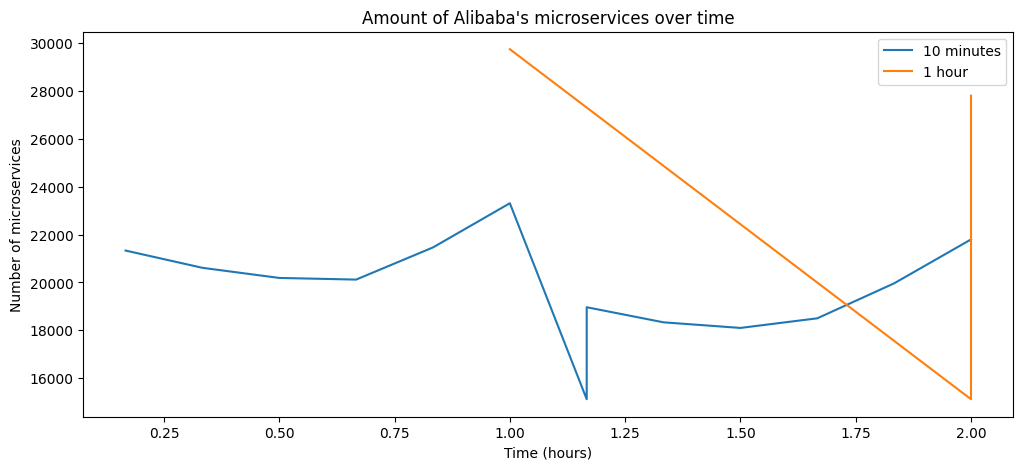

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

window_sizes = [600000, 3600000]  # Example window sizes in milliseconds
window_labels = ['10 minutes', '1 hour']  # Labels for the plot legend

plt.figure(figsize=(12, 5))

for window_size, label in zip(window_sizes, window_labels):
    # Re-initialize the generator for each window size
    graphs_lazy = load_graphs_lazy(graph_paths)

    num_nodes = []
    time = []
    for g in graphs_lazy:
        if g is not None:
            for windowed_graph in g.rolling(window=window_size):
                result = windowed_graph.count_vertices()
                num_nodes.append(result)
                # Shift the time by the window size before converting to hours
                time_shifted = (windowed_graph.earliest_time + window_size) / 3600000
                time.append(time_shifted)
    
    plt.plot(time, num_nodes, label=label)

plt.xlabel("Time (hours)")
plt.ylabel("Number of microservices")
plt.title("Amount of Alibaba's microservices over time")
plt.legend()
plt.show()

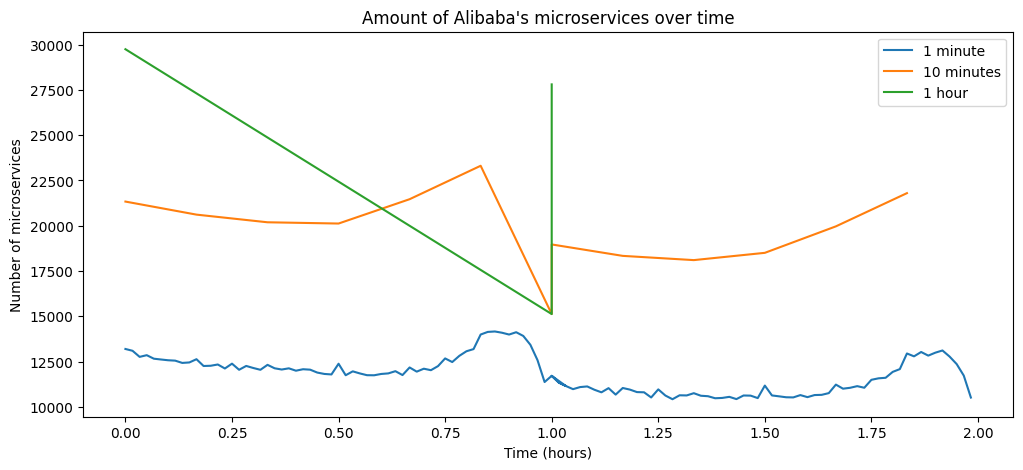

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from raphtory import algorithms as rp
from raphtory import Graph

window_sizes = [60000, 600000, 3600000]
window_labels = ['1 minute', '10 minutes', '1 hour']

plt.figure(figsize=(12, 5))

for window_size, label in zip(window_sizes, window_labels):
    # Re-initialize the generator for each window size
    graphs_lazy = load_graphs_lazy(graph_paths)

    num_nodes = []
    time = []
    for g in graphs_lazy:
        if g is not None:
            for windowed_graph in g.rolling(window=window_size):
                result = windowed_graph.count_vertices()
                num_nodes.append(result)
                time.append(windowed_graph.earliest_time / 3600000)
    
    plt.plot(time, num_nodes, label=label)

plt.xlabel("Time (hours)")
plt.ylabel("Number of microservices")
plt.title("Amount of Alibaba's microservices over time")
plt.legend()
plt.show()

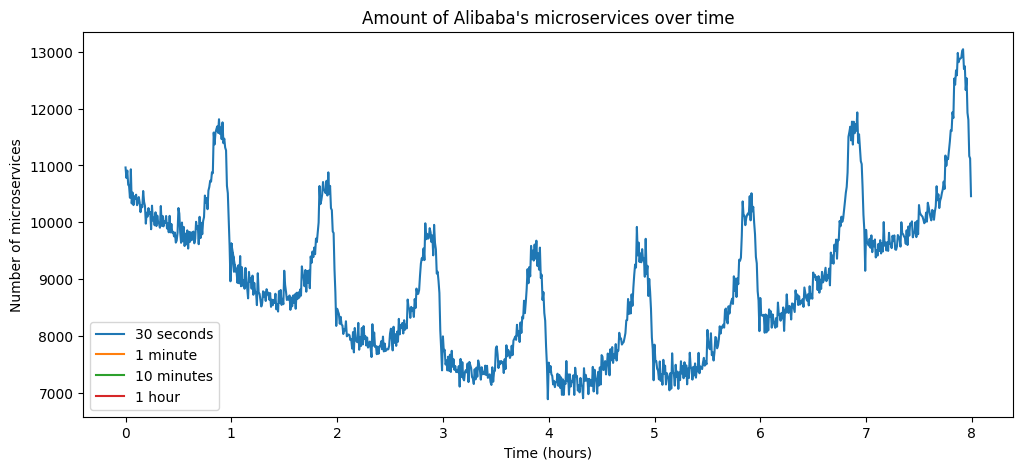

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from raphtory import algorithms as rp
from raphtory import Graph

# Set the window sizes
window_sizes = [30000, 60000, 600000, 3600000]

# Labels for the legend
window_labels = ['30 seconds', '1 minute', '10 minutes', '1 hour']

plt.figure(figsize=(12, 5))

for window_size, label in zip(window_sizes, window_labels):
    num_nodes = []
    time = []
    for g in graphs_lazy:
        # Check if the graph is loaded successfully
        if g is not None:
            for windowed_graph in g.rolling(window=window_size):
                result = windowed_graph.count_vertices()
                num_nodes.append(result)
                time.append(windowed_graph.earliest_time / 3600000)

    plt.plot(time, num_nodes, label=label)

plt.xlabel("Time (hours)")
plt.ylabel("Number of microservices")
plt.title("Amount of Alibaba's microservices over time")
plt.legend()
plt.show()

In [1]:
import os
from raphtory import Graph

def load_graphs_lazy(graph_paths):
    """Generator function to lazily load graphs from files."""
    for path in graph_paths:
        if os.path.isfile(path):
            print(f"Loading graph from: {path}")
            yield Graph.load_from_file(path)
        else:
            print(f"File does not exist: {path}")
            yield None

# Assuming you have a list of paths to your graph files
graph_paths = [f"C:/ms_bincode/Graph_{i}" for i in range(1, 3)]

# Use the generator to iterate over graphs lazily
graphs_lazy = load_graphs_lazy(graph_paths)

starting
Loading graph from: C:/ms_bincode/Graph_1
Loading graph from: C:/ms_bincode/Graph_2
Loading graph from: C:/ms_bincode/Graph_3
Loading graph from: C:/ms_bincode/Graph_4
Loading graph from: C:/ms_bincode/Graph_5
Loading graph from: C:/ms_bincode/Graph_6
Loading graph from: C:/ms_bincode/Graph_7
Loading graph from: C:/ms_bincode/Graph_8
Loading graph from: C:/ms_bincode/Graph_9
Loading graph from: C:/ms_bincode/Graph_10
Loading graph from: C:/ms_bincode/Graph_11
Loading graph from: C:/ms_bincode/Graph_12
Loading graph from: C:/ms_bincode/Graph_13
Loading graph from: C:/ms_bincode/Graph_14
Loading graph from: C:/ms_bincode/Graph_15
Loading graph from: C:/ms_bincode/Graph_16
Loading graph from: C:/ms_bincode/Graph_17
Loading graph from: C:/ms_bincode/Graph_18
Loading graph from: C:/ms_bincode/Graph_19
Loading graph from: C:/ms_bincode/Graph_20
Loading graph from: C:/ms_bincode/Graph_21
Loading graph from: C:/ms_bincode/Graph_22
Loading graph from: C:/ms_bincode/Graph_23
Loading gra

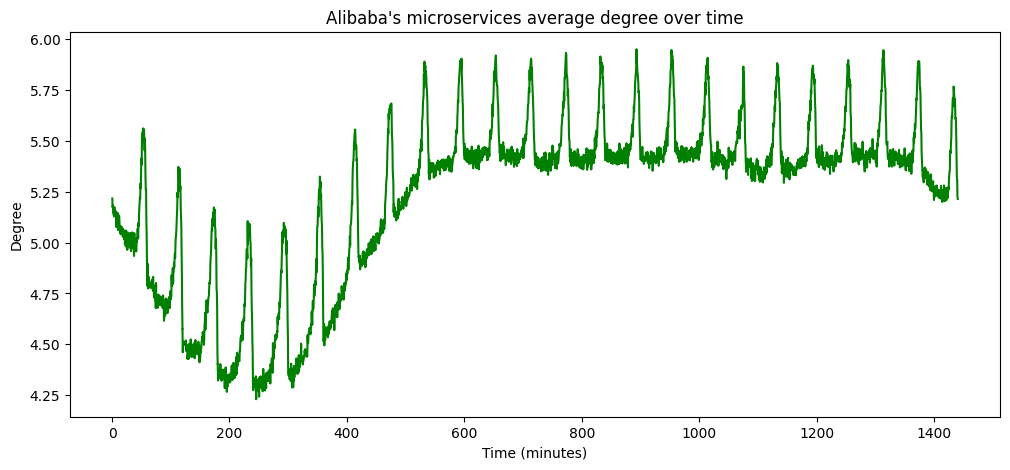

In [1]:
import os
import matplotlib.pyplot as plt
from raphtory import Graph
from raphtory import algorithms as rp

def load_graphs_lazy(graph_paths):
    """Generator function to lazily load graphs from files."""
    for path in graph_paths:
        if os.path.isfile(path):
            print(f"Loading graph from: {path}")
            yield Graph.load_from_file(path)
        else:
            print(f"File does not exist: {path}")
            yield None

# Assuming you have a list of paths to your graph files
graph_paths = [f"C:/ms_bincode/Graph_{i}" for i in range(1, 25)]

# Use the generator to iterate over graphs lazily
graphs_lazy = load_graphs_lazy(graph_paths)

# Initialise the plot with a set size
plt.figure(figsize=(12,5))

print("starting")

# Set a color for the plot line
line_colour = 'green'

# Keep track of the last point
last_time = 0
last_num_nodes = 0

# Iterate over each graph in the list
for g in graphs_lazy:
    if g is not None:  # Check if the graph is not None
        avg_degree = []
        time = []
        for windowed_graph in g.rolling(window=30000):
            result = rp.average_degree(windowed_graph)
            avg_degree.append(result)
            # Shift the time by the window size before converting to hours
            time_shifted = (windowed_graph.earliest_time + 30000) / 60000
            time.append(time_shifted)

        # If there is a last point, prepend it to this chunk to connect the lines
        if last_time != 0 and last_num_nodes != 0:
            time.insert(0, last_time)
            avg_degree.insert(0, last_num_nodes)

        # Plot the current chunk
        plt.plot(time, avg_degree, color=line_colour)

        # Update the last point
        last_time = time[-1]
        last_num_nodes = avg_degree[-1]

plt.xlabel("Time (minutes)")
plt.ylabel("Degree")
plt.title("Alibaba's microservices average degree over time")

# Display the plot
plt.show()

starting
Loading graph from: C:/ms_bincode/Graph_1
Loading graph from: C:/ms_bincode/Graph_2
Loading graph from: C:/ms_bincode/Graph_3
Loading graph from: C:/ms_bincode/Graph_4
Loading graph from: C:/ms_bincode/Graph_5
Loading graph from: C:/ms_bincode/Graph_6
Loading graph from: C:/ms_bincode/Graph_7
Loading graph from: C:/ms_bincode/Graph_8
Loading graph from: C:/ms_bincode/Graph_9
Loading graph from: C:/ms_bincode/Graph_10
Loading graph from: C:/ms_bincode/Graph_11
Loading graph from: C:/ms_bincode/Graph_12
Loading graph from: C:/ms_bincode/Graph_13
Loading graph from: C:/ms_bincode/Graph_14
Loading graph from: C:/ms_bincode/Graph_15
Loading graph from: C:/ms_bincode/Graph_16
Loading graph from: C:/ms_bincode/Graph_17
Loading graph from: C:/ms_bincode/Graph_18
Loading graph from: C:/ms_bincode/Graph_19
Loading graph from: C:/ms_bincode/Graph_20
Loading graph from: C:/ms_bincode/Graph_21
Loading graph from: C:/ms_bincode/Graph_22
Loading graph from: C:/ms_bincode/Graph_23
Loading gra

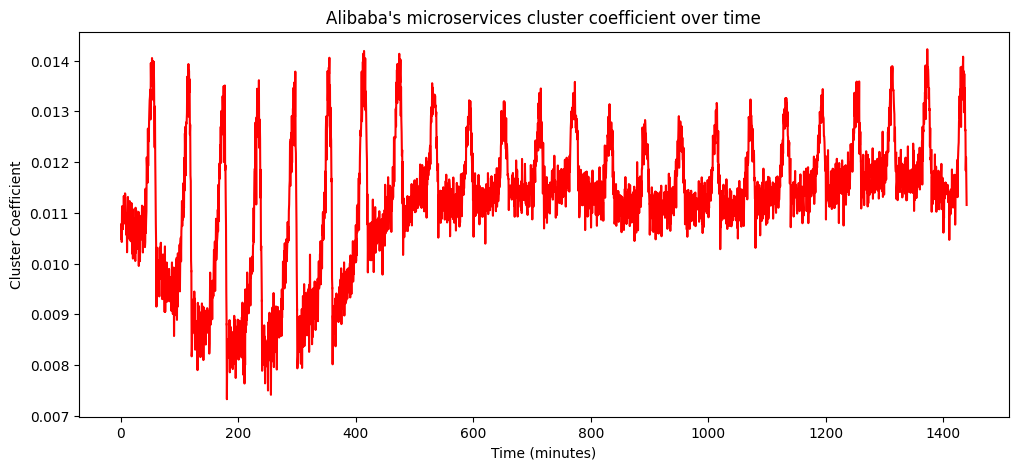

In [1]:
import os
import matplotlib.pyplot as plt
from raphtory import Graph
from raphtory import algorithms as rp

def load_graphs_lazy(graph_paths):
    """Generator function to lazily load graphs from files."""
    for path in graph_paths:
        if os.path.isfile(path):
            print(f"Loading graph from: {path}")
            yield Graph.load_from_file(path)
        else:
            print(f"File does not exist: {path}")
            yield None

# Assuming you have a list of paths to your graph files
graph_paths = [f"C:/ms_bincode/Graph_{i}" for i in range(1, 25)]

# Use the generator to iterate over graphs lazily
graphs_lazy = load_graphs_lazy(graph_paths)

# Initialise the plot with a set size
plt.figure(figsize=(12,5))

print("starting")

# Set a color for the plot line
line_colour = 'red'

# Keep track of the last point
last_time = 0
last_num_nodes = 0

# Iterate over each graph in the list
for g in graphs_lazy:
    if g is not None:  # Check if the graph is not None
        clstr_cfsnt = []
        time = []
        for windowed_graph in g.rolling(window=30000):
            result = rp.global_clustering_coefficient(windowed_graph)
            clstr_cfsnt.append(result)
            # Shift the time by the window size before converting to hours
            time_shifted = (windowed_graph.earliest_time + 30000) / 60000
            time.append(time_shifted)

        # If there is a last point, prepend it to this chunk to connect the lines
        if last_time != 0 and last_num_nodes != 0:
            time.insert(0, last_time)
            clstr_cfsnt.insert(0, last_num_nodes)

        # Plot the current chunk
        plt.plot(time, clstr_cfsnt, color=line_colour)

        # Update the last point
        last_time = time[-1]
        last_num_nodes = clstr_cfsnt[-1]

plt.xlabel("Time (minutes)")
plt.ylabel("Cluster Coefficient")
plt.title("Alibaba's microservices cluster coefficient over time")

# Display the plot
plt.show()

starting
Loading graph from: C:/ms_bincode/Graph_1
Loading graph from: C:/ms_bincode/Graph_2
Loading graph from: C:/ms_bincode/Graph_3
Loading graph from: C:/ms_bincode/Graph_4
Loading graph from: C:/ms_bincode/Graph_5
Loading graph from: C:/ms_bincode/Graph_6
Loading graph from: C:/ms_bincode/Graph_7
Loading graph from: C:/ms_bincode/Graph_8
Loading graph from: C:/ms_bincode/Graph_9
Loading graph from: C:/ms_bincode/Graph_10
Loading graph from: C:/ms_bincode/Graph_11
Loading graph from: C:/ms_bincode/Graph_12
Loading graph from: C:/ms_bincode/Graph_13
Loading graph from: C:/ms_bincode/Graph_14
Loading graph from: C:/ms_bincode/Graph_15
Loading graph from: C:/ms_bincode/Graph_16
Loading graph from: C:/ms_bincode/Graph_17
Loading graph from: C:/ms_bincode/Graph_18
Loading graph from: C:/ms_bincode/Graph_19
Loading graph from: C:/ms_bincode/Graph_20
Loading graph from: C:/ms_bincode/Graph_21
Loading graph from: C:/ms_bincode/Graph_22
Loading graph from: C:/ms_bincode/Graph_23
Loading gra

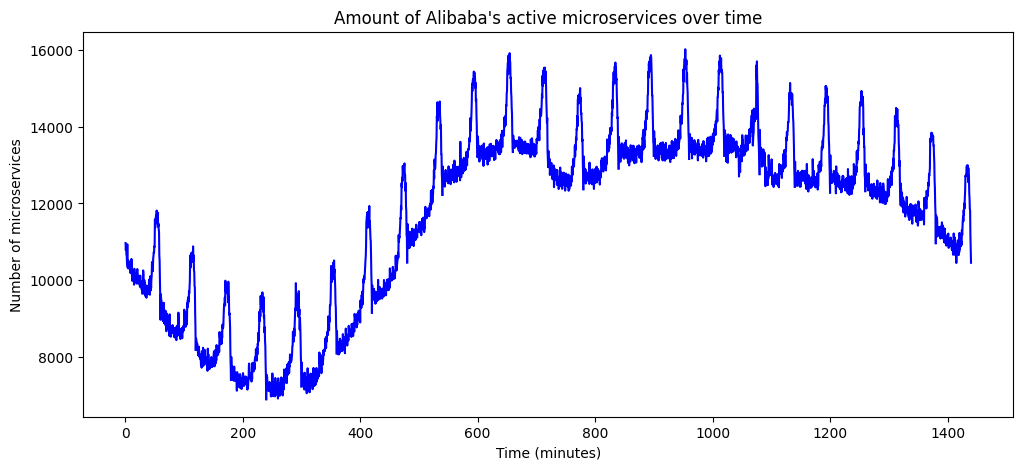

In [1]:
import os
import matplotlib.pyplot as plt
from raphtory import Graph

def load_graphs_lazy(graph_paths):
    """Generator function to lazily load graphs from files."""
    for path in graph_paths:
        if os.path.isfile(path):
            print(f"Loading graph from: {path}")
            yield Graph.load_from_file(path)
        else:
            print(f"File does not exist: {path}")
            yield None

# Assuming you have a list of paths to your graph files
graph_paths = [f"C:/ms_bincode/Graph_{i}" for i in range(1, 25)]

# Use the generator to iterate over graphs lazily
graphs_lazy = load_graphs_lazy(graph_paths)

# Initialise the plot with a set size
plt.figure(figsize=(12,5))

print("starting")

# Set a color for the plot line
line_colour = 'blue'

# Keep track of the last point
last_time = 0
last_num_nodes = 0

# Iterate over each graph in the list
for g in graphs_lazy:
    if g is not None:  # Check if the graph is not None
        num_nodes = []
        time = []
        for windowed_graph in g.rolling(window=30000):
            result = windowed_graph.count_vertices()
            num_nodes.append(result)
            # Shift the time by the window size before converting to hours
            time_shifted = (windowed_graph.earliest_time + 30000) / 60000
            time.append(time_shifted)

        # If there is a last point, prepend it to this chunk to connect the lines
        if last_time != 0 and last_num_nodes != 0:
            time.insert(0, last_time)
            num_nodes.insert(0, last_num_nodes)

        # Plot the current chunk
        plt.plot(time, num_nodes, color=line_colour)

        # Update the last point
        last_time = time[-1]
        last_num_nodes = num_nodes[-1]

plt.xlabel("Time (minutes)")
plt.ylabel("Number of microservices")
plt.title("Amount of Alibaba's active microservices over time")

# Display the plot
plt.show()